# Project #2: Investigate a Medical Appontment Dataset
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

These report is based on a dataset that collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. Analysis will be conducted to try to understand what is correlated with not showing up to the appointment.

Dependent variable: **no show** (wheter patient showed up for the appointment)

Independent variables: 
    1. Receiving a SMS
    2. Having health problems
    3. Receiving a scholarship (i.e. taking part in the Bolsa Familia)


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [134]:
# Load  data and print out a few lines
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [135]:
#check number of rows and columns

df.shape

(110527, 14)

Result: there are 110527 rows and 14 columns

In [136]:
#check data types and if there are missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Result: there are no missing values

In [137]:
#check if there are any duplicated rows

df.duplicated().value_counts()

False    110527
dtype: int64

Result: no duplicates were found

In [138]:
#check if there are any patients appearing more than once in the dataset

df['PatientId'].duplicated().value_counts()

False    62299
True     48228
Name: PatientId, dtype: int64

Result: there are 48228 apoointments who are at least 2nd time visits

In [139]:
#check quick stats of dataset

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning

In [140]:
#drop 'AppointmentID' column as it is not relevant to the analysis
df.drop('AppointmentID', axis=1, inplace=True)

In [141]:
#rename columns to be lowercase, with underscore and no spaces at both ends
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [142]:
#rename 'no_show' column to clearer name 'show?'
df.rename(columns={'no_show': 'show_or_no_show'}, inplace=True)

In [143]:
#replace 'No' and 'Yes' for clearer tags: 'show' and 'no_show'

df['show_or_no_show'].replace({'No': 'show', 'Yes': 'no_show'}, inplace=True)

In [144]:
#create column that sums up the number of health problems each patient has
sum_health_problems = df['hipertension'] + df['diabetes'] + df['alcoholism'] + df['handcap']
df['health_problems'] = sum_health_problems

In [145]:
#check cleaned dataset
df.head()

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show_or_no_show,health_problems
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,show,1
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,show,0
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,show,0
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,show,0
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,show,2


In [146]:
# convert dates from string to datetime format
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['scheduledday'] = pd.to_datetime(df['scheduledday'])

<a id='eda'></a>
## Exploratory Data Analysis


First, let's create a number of histograms to have a quick overview of the distribution of patients across different variables

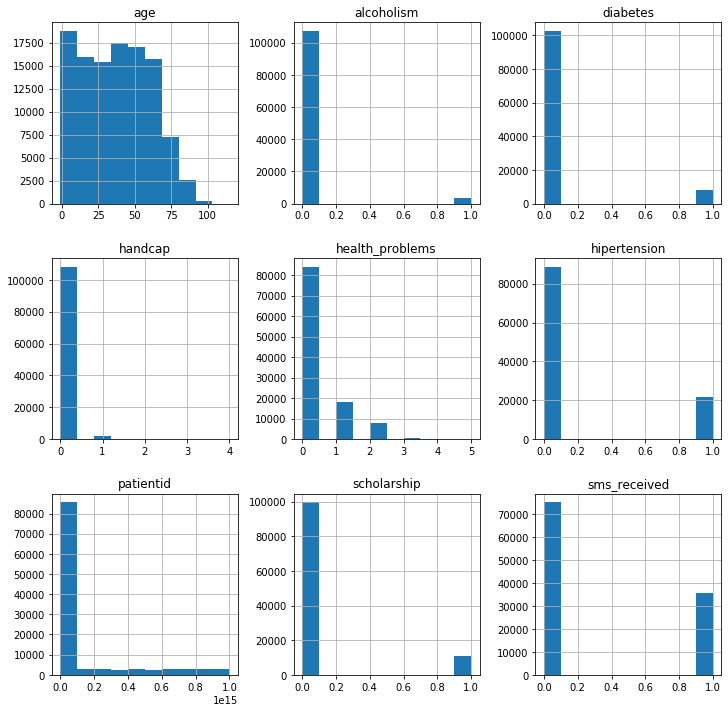

In [147]:
# create an histogram to each variable
df.hist(figsize=(12,12));

In [148]:
#create shortcuts for quicker analysis further on
show = df['show_or_no_show'] == 'show'
no_show = df['show_or_no_show'] == 'no_show'

### Research Question 1: Does receiving an SMS lead to higher attendance levels?

Goal: check whether people who received a reminder-SMS were more likely to show up

0    75045
1    35482
Name: sms_received, dtype: int64


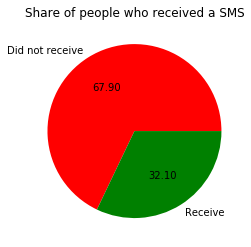

In [149]:
#check difference in amount of people who received sms or not
print(df['sms_received'].value_counts())
plt.pie(df['sms_received'].value_counts(), labels=['Did not receive', "Receive"], colors=['red', 'green'], autopct='%.2f')
plt.title('Share of people who received a SMS');

In [150]:
#check relative difference between amount of people who received vs didn't receive SMS
print(75045/35482)

2.1150160644834


Result: 2.1x more people did not have received an SMS

Now let's create a chart to compare the receival of an SMS with whether people showed up to the appointment or not

''

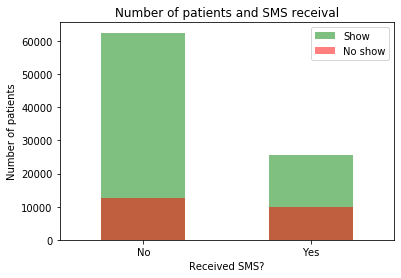

In [151]:
# create a bar charts showing this
df.sms_received[show].value_counts().plot(kind='bar', alpha=0.5, color='green')
df.sms_received[no_show].value_counts().plot(kind='bar', alpha=0.5, color='red')
plt.title('Number of patients and SMS receival')
plt.ylabel('Number of patients')
plt.xlabel('Received SMS?')
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.legend(['Show', 'No show'])
;


In [152]:
#in patients who showed up, check the relative difference between received vs. didn't receive SMS
print(62510/25698)

2.432485018289361


Result: there doesn't seem to be a positive correlation between receiving an sms and showing up. In patients that showed up, there were 2.4x more patients that did not receive an SMS

In [153]:
#check whether on average, appointments in which patients showed up, these patients tended to have received an SMS
df.groupby('show_or_no_show').sms_received.mean()

show_or_no_show
no_show    0.438371
show       0.291334
Name: sms_received, dtype: float64

In [154]:
#compare this with the average for all patients, independent whether they received an SMS or not
df['sms_received'].mean()

0.32102563174608917

Result: on average, patients that did not show up were actually more likely to have received an SMS

### Research Question 2: Does having more health problems lead to higher attendance levels?

First of all, let's analyse the relationship between the number of different health problems someone has and their age

''

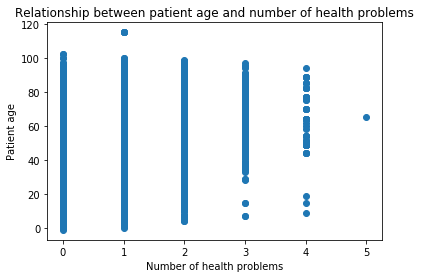

In [155]:
# create scatter plot showing this relationship
x = df['health_problems']
y = df['age']
plt.scatter(x, y)
plt.title('Relationship between patient age and number of health problems')
plt.ylabel('Patient age')
plt.xlabel('Number of health problems')
;

Result: the number of health problems someone has seems to be positively correlated with age. To make sure of that, let's analyse the average age for people in each group of number of health problems:

In [156]:
# calculate average age for each health group 
df.groupby('health_problems').age.mean()

health_problems
0    30.515069
1    56.304763
2    61.510895
3    64.068910
4    63.174603
5    65.000000
Name: age, dtype: float64

Result: these averages confirm the hypothesis as the higher the number of health problems someone has, the higher their average age tends to be

Now let's try to see if the number of health problems someone has impacts their likelyhood to show up to an appointment

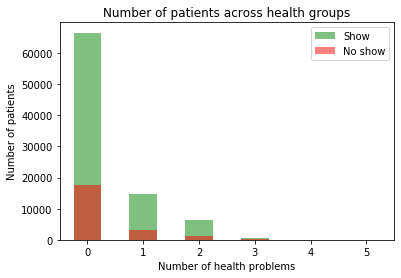

In [157]:
# create graph showing the distribution of patients across health groups
df.health_problems[show].value_counts().plot(kind='bar', alpha=0.5, color='green')
df.health_problems[no_show].value_counts().plot(kind='bar', alpha=0.5, color='red')
plt.title('Number of patients across health groups')
plt.ylabel('Number of patients')
plt.xlabel('Number of health problems')
plt.xticks(rotation=0)
plt.legend(['Show', 'No show']);


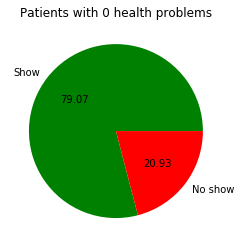

In [158]:
plt.pie(df.query('health_problems == "0"').show_or_no_show.value_counts(), labels=['Show', 'No show'], colors=['green', 'red'], autopct='%.2f')
plt.title('Patients with 0 health problems');

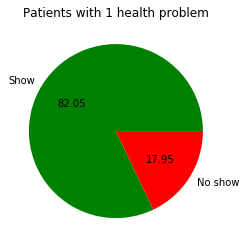

In [159]:
plt.pie(df.query('health_problems == "1"').show_or_no_show.value_counts(), labels=['Show', 'No show'], colors=['green', 'red'], autopct='%.2f')
plt.title('Patients with 1 health problem');

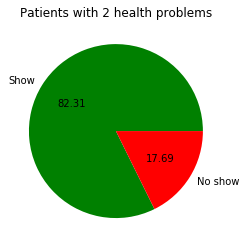

In [160]:
plt.pie(df.query('health_problems == "2"').show_or_no_show.value_counts(), labels=['Show', 'No show'], colors=['green', 'red'], autopct='%.2f')
plt.title('Patients with 2 health problems');

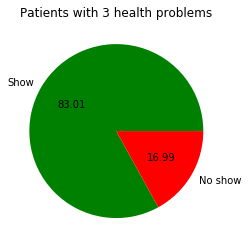

In [161]:
plt.pie(df.query('health_problems == "3"').show_or_no_show.value_counts(), labels=['Show', 'No show'], colors=['green', 'red'], autopct='%.2f'), 
plt.title('Patients with 3 health problems');

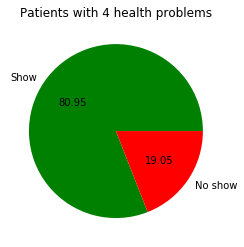

In [162]:
plt.pie(df.query('health_problems == "4"').show_or_no_show.value_counts(), labels=['Show', 'No show'], colors=['green', 'red'], autopct='%.2f'), 
plt.title('Patients with 4 health problems');

Result: there seems to be a positive correlation between showing up and having an increasing number of health problems. The share of patients showing up to the appointment increased with each higher number of health problems up to 3 health problems. The fact that at 4 health problems this number was lower again can be attributed to the small number of total patients (less than 60 patients have 4 health problems) so the sample is not representative.

Potential for improvement: the results of each pie chart above could be consolidated into a single stacked bar chart to better represent this trend.

### Research Question 3: Does having a scholarship (participating in the Bolsa Familia) increase attendance levels?

In [163]:
df.groupby('scholarship').show_or_no_show.value_counts()

scholarship  show_or_no_show
0            show               79925
             no_show            19741
1            show                8283
             no_show             2578
Name: show_or_no_show, dtype: int64

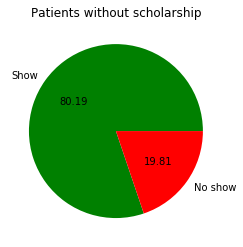

In [164]:
plt.pie(df.query('scholarship == "0"').show_or_no_show.value_counts(), labels=['Show', 'No show'], colors=['green', 'red'], autopct='%.2f')
plt.title('Patients without scholarship');

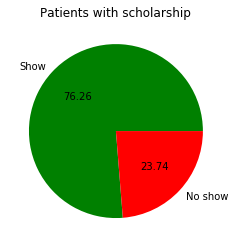

In [165]:
plt.pie(df.query('scholarship == "1"').show_or_no_show.value_counts(), labels=['Show', 'No show'], colors=['green', 'red'], autopct='%.2f')
plt.title('Patients with scholarship');

Results: in relative terms, people who have a scholarship tended to not show up to the appointment more than those who did have a scholarship

<a id='conclusions'></a>
## Conclusions

RESULTS

> Receiving an SMS did not suggest higher attendance levels, since for those that did not show up, a bigger share of them received an SMS.

> The more health problems someone had (alcoholism, diabetes, hipertension and being handicaped each equally counted as one health problem) the more likely it seemed that the person would show up. However, that difference was very small and at 4 health problems it actually decreased. This could be caused due to the small sample of people with all 4 health problems (less than 60) but more work would have to be done to check if that correlation is significant.

> Finally, people not receiving a scholarship were more likely to show up by around 4 percentage points - but these could due to other non-analysed variables.

LIMITATIONS
> None of the calculations above were comprehensive enough to suggest possible reasons why patients did not show up to the appointments. There were some correlations found but more work would have to be done to find relevant causal relationships.

> The time window of the data used for analysis is also a short one, being only for appointments in one year (2016). This increases the chances that unknown factors that were prominent mostly in that year are impacting the final results.

> The amount of different sources of information about patients or the appointments is also low. For instance, having information about the distance of people's work/home to the place of appointment could be important as it could have a high impact on whether people show up to the appointnment or not.

FURTHER RESEARCH

> Other possible further research points are: check whether if patients are more likely to show up in subsequent visits, analyse if location and age have any correlation with attendance levels, and etc.